## **CIND 820 - Big Data Analytics Project**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split # to apply train-test split
from sklearn.ensemble import RandomForestClassifier # to implement Random Forest modeling
from sklearn.model_selection import cross_val_score # to apply k-fold cross-validation 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report # to evaluate the model's performance
from sklearn.metrics import ConfusionMatrixDisplay # to display the confusion matrix

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

**Create a data frame of the Room Occupancy dataset. Display the names of the columns. Check the data types of the attributes. Run a summary statistics of the dataset.**

In [2]:
# Read the CSV file into a data frame called Occupancy
Occupancy = pd.read_csv('Occupancy_Estimation.csv')

# Display the first five records of the data frame
Occupancy.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [3]:
# Get the column names
print("Column Names:", Occupancy.columns)

Column Names: Index(['Date', 'Time', 'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light',
       'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound',
       'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR',
       'Room_Occupancy_Count'],
      dtype='object')


In [4]:
# Get the data types of each column
print("\nData Types of Each Column:")
print(Occupancy.dtypes)


Data Types of Each Column:
Date                     object
Time                     object
S1_Temp                 float64
S2_Temp                 float64
S3_Temp                 float64
S4_Temp                 float64
S1_Light                  int64
S2_Light                  int64
S3_Light                  int64
S4_Light                  int64
S1_Sound                float64
S2_Sound                float64
S3_Sound                float64
S4_Sound                float64
S5_CO2                    int64
S5_CO2_Slope            float64
S6_PIR                    int64
S7_PIR                    int64
Room_Occupancy_Count      int64
dtype: object


In [5]:
# Get the summary statistics
print("Summary Statistics:")
print(Occupancy.describe())

Summary Statistics:
            S1_Temp       S2_Temp       S3_Temp       S4_Temp      S1_Light  \
count  10129.000000  10129.000000  10129.000000  10129.000000  10129.000000   
mean      25.454012     25.546059     25.056621     25.754125     25.445059   
std        0.351351      0.586325      0.427283      0.356434     51.011264   
min       24.940000     24.750000     24.440000     24.940000      0.000000   
25%       25.190000     25.190000     24.690000     25.440000      0.000000   
50%       25.380000     25.380000     24.940000     25.750000      0.000000   
75%       25.630000     25.630000     25.380000     26.000000     12.000000   
max       26.380000     29.000000     26.190000     26.560000    165.000000   

          S2_Light      S3_Light      S4_Light      S1_Sound      S2_Sound  \
count  10129.00000  10129.000000  10129.000000  10129.000000  10129.000000   
mean      26.01629     34.248494     13.220259      0.168178      0.120066   
std       67.30417     58.400744  

**Split the data into training and testing sets**

In [9]:
# Split the data into features (X) and target(y)
X = Occupancy[['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp',
               'S1_Light', 'S2_Light', 'S3_Light', 'S4_Light',
               'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound',
               'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR']]

y = Occupancy['Room_Occupancy_Count']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR
1937,25.19,25.19,24.63,25.56,0,0,0,0,0.08,0.05,0.06,0.05,360,0.000000,0,0
4477,25.38,25.38,24.81,25.75,0,0,0,0,0.07,0.05,0.06,0.06,365,0.000000,0,0
8550,25.56,25.63,25.31,25.69,0,0,0,0,0.07,0.05,0.05,0.08,530,-2.592308,0,0
1346,25.50,25.50,25.06,25.88,0,0,0,0,0.07,0.04,0.07,0.06,390,-0.642308,0,0
7296,25.38,25.38,24.88,25.75,0,0,0,0,0.07,0.05,0.06,0.10,355,0.000000,0,0


**Experiment with undersampling of the majority class**

In [11]:
from collections import Counter

# Summarize class distribution
print(Counter(y_train))

Counter({0: 6609, 2: 584, 3: 554, 1: 356})


In [12]:
from imblearn.under_sampling import RandomUnderSampler


# Define undersample strategy
undersample = RandomUnderSampler(random_state=42, sampling_strategy='majority')

In [13]:
# Fit and apply the transform
X_over, y_over = undersample.fit_resample(X_train, y_train)

In [14]:
# Summarize class distribution
print(Counter(y_over))

Counter({2: 584, 3: 554, 0: 356, 1: 356})


**Use Random Forest for modeling**

In [15]:
# Create a Random Forest classifier
model = RandomForestClassifier()

**Apply cross validation on the training set**

In [16]:
# Apply cross-validation on the training set
#scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
scores = cross_val_score(model, X_over, y_over, cv=10, scoring='accuracy')

# Evaluation metrics
print(f'Cross-Validation Accuracy Scores on Training Set: {scores}')
print(f'Average Cross-Validation Accuracy on Training Set: {scores.mean()}')

Cross-Validation Accuracy Scores on Training Set: [0.98378378 0.99459459 0.98378378 0.99459459 0.98378378 0.98918919
 0.98918919 1.         0.99459459 0.98918919]
Average Cross-Validation Accuracy on Training Set: 0.9902702702702703


**Train the model on the full training set and evaluate on the test set** 

In [17]:
# Train the model using the training set
#model.fit(X_train, y_train)
model.fit(X_over, y_over)

RandomForestClassifier()

In [18]:
# Predict the response using the test set
y_pred = model.predict(X_test)
print(y_pred[:20])

[0 1 0 0 0 0 0 0 0 1 3 0 0 0 1 0 0 3 2 0]


In [19]:
# Calculate evaluation metrics
test_accuracy = accuracy_score(y_test, y_pred)          # actual (true) labels vs predicted labels

conf_matrix = confusion_matrix(y_test, y_pred)

print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9975320829220138


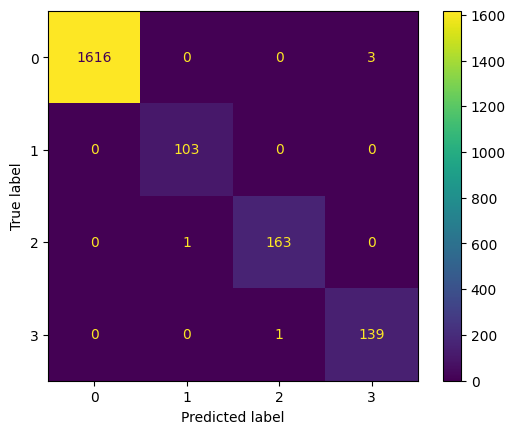

In [20]:
# Display the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot();

In [22]:
# Calculate the performance metrics on the test set
class_report = classification_report(y_test, y_pred, digits=3)
print(class_report)

              precision    recall  f1-score   support

           0      1.000     0.998     0.999      1619
           1      0.990     1.000     0.995       103
           2      0.994     0.994     0.994       164
           3      0.979     0.993     0.986       140

    accuracy                          0.998      2026
   macro avg      0.991     0.996     0.993      2026
weighted avg      0.998     0.998     0.998      2026



**Visualizing the Results**

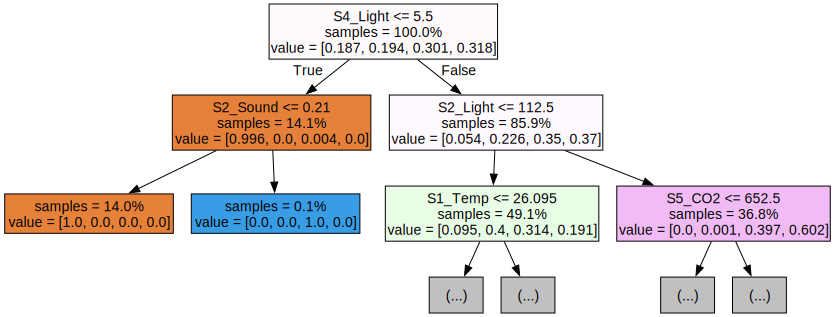

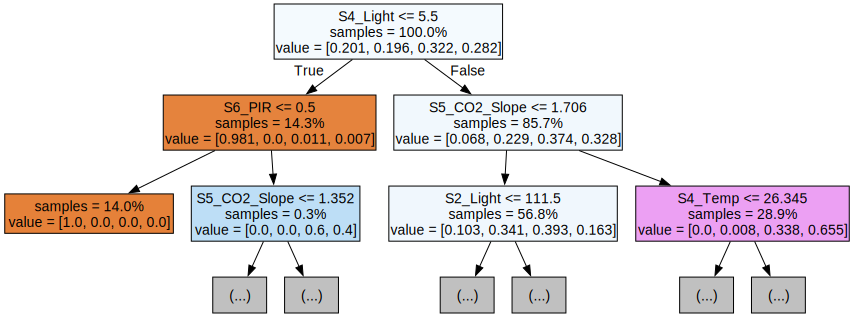

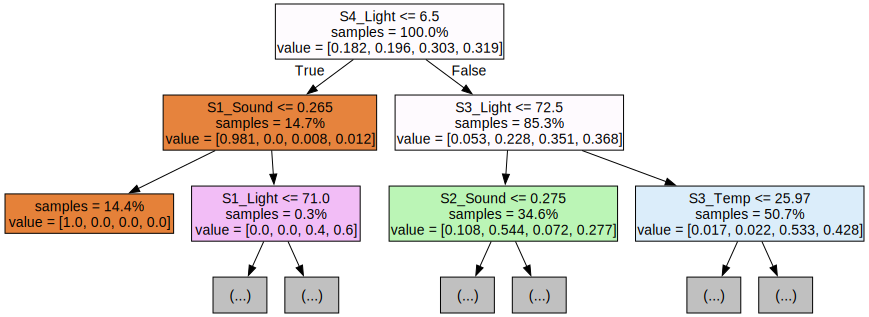

In [23]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = model.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

**Plot the importance of each feature**

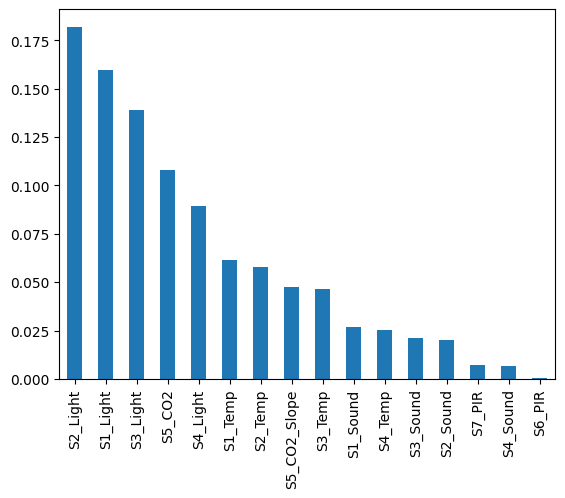

In [24]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

**Rerun the model with PCA components**

In [25]:
# Read the CSV file into a data frame called PCA
PCA = pd.read_csv('pca.csv', usecols=range(1,9)) # Read all columns except the first one

# Display the first five records of the data frame
PCA.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,Room_Occupancy_Count
0,-0.686113,2.102322,1.957106,0.191789,-0.101719,-0.803158,-0.143256,1
1,-0.131358,2.522851,1.541169,0.622188,0.541418,-1.301222,2.233778,1
2,-0.450642,2.154163,1.734071,0.452159,0.136148,-1.086528,0.864504,1
3,-0.383169,2.119162,1.594852,0.562530,0.021398,-1.083995,0.785992,1
4,-0.683429,1.742131,1.870580,0.427451,-0.191480,-1.099345,0.302282,1


In [26]:
# Define the predictor and target variables
X = PCA.iloc[:, 0:7]
y  = PCA['Room_Occupancy_Count']

X.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.686113,2.102322,1.957106,0.191789,-0.101719,-0.803158,-0.143256
1,-0.131358,2.522851,1.541169,0.622188,0.541418,-1.301222,2.233778
2,-0.450642,2.154163,1.734071,0.452159,0.136148,-1.086528,0.864504
3,-0.383169,2.119162,1.594852,0.562530,0.021398,-1.083995,0.785992
4,-0.683429,1.742131,1.870580,0.427451,-0.191480,-1.099345,0.302282


In [27]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Create a Random Forest classifier
model_pca = RandomForestClassifier()

In [29]:
# Apply cross-validation on the training set
scores = cross_val_score(model_pca, X_train, y_train, cv=10, scoring='accuracy')

# Evaluation metrics
print(f'Cross-Validation Accuracy Scores on Training Set: {scores}')
print(f'Average Cross-Validation Accuracy on Training Set: {scores.mean()}')

Cross-Validation Accuracy Scores on Training Set: [0.99260173 0.99260173 0.98150432 0.98518519 0.99382716 0.98888889
 0.98395062 0.99876543 0.98888889 0.98888889]
Average Cross-Validation Accuracy on Training Set: 0.989510282991582


In [30]:
# Train the model using the training set
model_pca.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
# Predict the response using the test set
y_pred = model_pca.predict(X_test)

In [32]:
# Calculate evaluation metrics
test_accuracy = accuracy_score(y_test, y_pred)          # actual (true) labels vs predicted labels

conf_matrix = confusion_matrix(y_test, y_pred)

print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.989634748272458


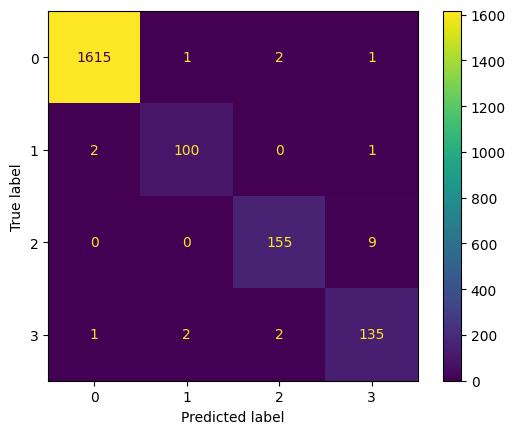

In [33]:
# Display the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot();

In [34]:
# Calculate the performance metrics on the test set
class_report = classification_report(y_test, y_pred, digits=3)
print(class_report)

              precision    recall  f1-score   support

           0      0.998     0.998     0.998      1619
           1      0.971     0.971     0.971       103
           2      0.975     0.945     0.960       164
           3      0.925     0.964     0.944       140

    accuracy                          0.990      2026
   macro avg      0.967     0.969     0.968      2026
weighted avg      0.990     0.990     0.990      2026

